<a href="https://colab.research.google.com/github/KushagraSaxena19/Task-Tracker/blob/main/todo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [17]:
from datetime import datetime
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.cluster import KMeans
import random


In [18]:
class Task:
    def __init__(self, description, date=None, priority=None):
        self.description = description
        self.date = datetime.strptime(date, "%d/%m") if date else None
        self.priority = priority
        self.completed = {}
        self.completion_dates = {}

class ToDoList:
    def __init__(self, students):
        self.tasks = []
        self.students = students

    def add_task(self, description, date, priority):
        task = Task(description, date, priority)
        task.completed = {student: False for student in self.students}
        task.completion_dates = {student: None for student in self.students}
        self.tasks.append(task)

    def mark_tasks_completed(self, task_numbers, student_name, completion_dates):
        for task_num, completion_date in zip(task_numbers, completion_dates):
            if 0 < task_num <= len(self.tasks):
                task = self.tasks[task_num - 1]
                task.completed[student_name] = True
                task.completion_dates[student_name] = datetime.strptime(completion_date, "%d/%m")

    def display_comparison_table(self):
        if not self.tasks:
            print("No tasks available for comparison.")
            return

        header = ['Student'] + [f'Task {i + 1} ({task.priority})' for i, task in enumerate(self.tasks)]
        print("┌───────────────" + "┬─────────────" * len(self.tasks) + "┐")
        print("│ " + " │ ".join(f"{h: <13}" for h in header) + " │")
        print("├───────────────" + "┼─────────────" * len(self.tasks) + "┤")

        for student in self.students:
            row = [student] + [
                self.get_task_status(task, student) for task in self.tasks
            ]
            print("│ " + " │ ".join(f"{item: <13}" for item in row) + " │")
            print("├───────────────" + "┼─────────────" * len(self.tasks) + "┤")
        print("└───────────────" + "┴─────────────" * len(self.tasks) + "┘")

    def get_task_status(self, task, student_name):
        if task.completed[student_name]:
            completion_date = task.completion_dates[student_name]
            if completion_date and task.date and completion_date > task.date:
                return "✔️⚠️"  # Task completed but late
            else:
                return "✔️"  # Task completed on time
        else:
            return "❌"  # Task not completed

    def cluster_students(self):
        completed_counts = {student: sum(task.completed[student] for task in self.tasks) for student in self.students}
        df = pd.DataFrame(list(completed_counts.items()), columns=['Student', 'Tasks Completed'])

        X = df[['Tasks Completed']].values
        inertia = []
        max_clusters = min(10, len(self.students))
        for i in range(1, max_clusters + 1):
            kmeans = KMeans(n_clusters=i, random_state=0).fit(X)
            inertia.append(kmeans.inertia_)

        plt.plot(range(1, max_clusters + 1), inertia, marker='o')
        plt.title('Elbow Method')
        plt.xlabel('Number of clusters')
        plt.ylabel('Inertia')
        plt.show()

        kmeans = KMeans(n_clusters=3, random_state=0).fit(X)
        df['Cluster'] = kmeans.labels_

        colors = ['red', 'green', 'blue']
        plt.figure(figsize=(8, 5))
        for cluster in range(3):
            clustered_data = df[df['Cluster'] == cluster]
            plt.scatter(clustered_data['Student'], clustered_data['Tasks Completed'], color=colors[cluster], s=100, label=f'Cluster {cluster + 1}')

        plt.xlabel('Students')
        plt.ylabel('Tasks Completed')
        plt.title('Clustering of Students Based on Task Completion')
        plt.xticks(rotation=45)
        plt.legend()
        plt.show()

        underperforming_students = [student for student, count in completed_counts.items() if count < 2]
        if underperforming_students:
            print("Notice: The following students have not completed at least 2 tasks. Please complete your future tasks before the due date:")
            print("\n".join(underperforming_students))


In [19]:
def main():
    students = [f"Student_{i + 1}" for i in range(20)]
    todo_list = ToDoList(students)

    for _ in range(5):
        description = f"Task {_ + 1}"
        date = f"{random.randint(1, 28)}/{random.randint(1, 12)}"
        priority = random.choice(['High', 'Medium', 'Low'])
        todo_list.add_task(description, date, priority)

    for student in students:
        completed_tasks = random.sample(range(1, len(todo_list.tasks) + 1), random.randint(1, len(todo_list.tasks)))
        completion_dates = [f"{random.randint(1, 28)}/{random.randint(1, 12)}" for _ in completed_tasks]
        todo_list.mark_tasks_completed(completed_tasks, student, completion_dates)

    todo_list.display_comparison_table()
    todo_list.cluster_students()


┌───────────────┬─────────────┬─────────────┬─────────────┬─────────────┬─────────────┐
│ Student       │ Task 1 (Medium) │ Task 2 (Low)  │ Task 3 (Low)  │ Task 4 (High) │ Task 5 (Medium) │
├───────────────┼─────────────┼─────────────┼─────────────┼─────────────┼─────────────┤
│ Student_1     │ ❌             │ ✔️            │ ✔️⚠️          │ ✔️            │ ✔️            │
├───────────────┼─────────────┼─────────────┼─────────────┼─────────────┼─────────────┤
│ Student_2     │ ❌             │ ❌             │ ❌             │ ✔️⚠️          │ ❌             │
├───────────────┼─────────────┼─────────────┼─────────────┼─────────────┼─────────────┤
│ Student_3     │ ❌             │ ❌             │ ❌             │ ❌             │ ✔️            │
├───────────────┼─────────────┼─────────────┼─────────────┼─────────────┼─────────────┤
│ Student_4     │ ✔️⚠️          │ ❌             │ ❌             │ ✔️            │ ❌             │
├───────────────┼─────────────┼─────────────┼─────────────┼───────

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1473: ConvergenceWarning: Number of distinct clusters (5) found smaller than n_clusters (6). Possibly due to duplicate points in X.
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1473: ConvergenceWarning: Number of distinct clusters (5) found smaller than n_clusters (7). Possibly due to duplicate points in X.
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1473: ConvergenceWarning: Number of distinct clusters (5) found smaller than n_clusters (8). Possibly due to duplicate points in X.
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1473: ConvergenceWarning: Number of distinct clusters (5) found smaller than n_clusters (9). Possibly due to duplicate points in X.
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:

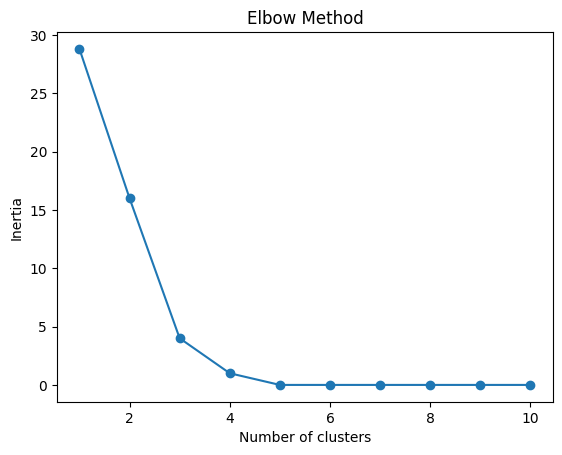

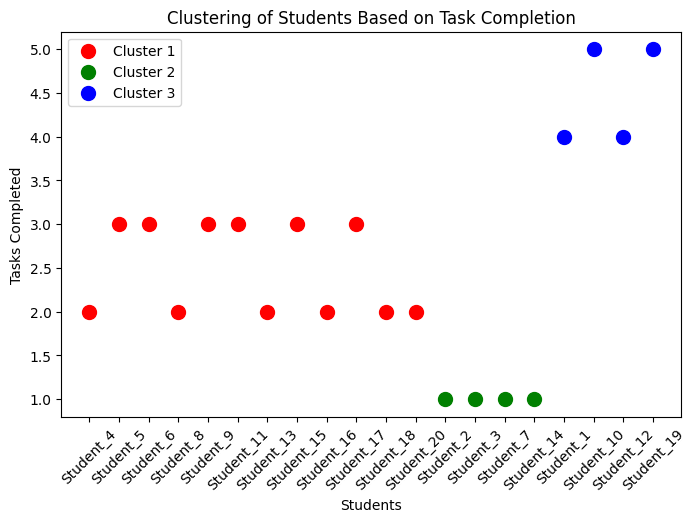

Notice: The following students have not completed at least 2 tasks. Please complete your future tasks before the due date:
Student_2
Student_3
Student_7
Student_14


In [20]:
if __name__ == "__main__":
    main()